# Product Rating Predictor: Analyzing Flipkart Reviews 

## Importing Important Libraries

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import nltk
from nltk.corpus import stopwords
import emoji
from textblob import TextBlob
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


In [187]:
df = pd.read_csv('flipkart.csv')

In [188]:
df.head(20)

1                                                  2  \
0   NaN                                                NaN   
1   4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
2   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
3   3.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
4   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
5   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
6   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
7   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
8   5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
9   1.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
10  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
11  NaN                                                NaN   
12  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
13  4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
14  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
15  4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
16  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
17  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
18  5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
19  3.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   

                      3                                                  4  \
0                   NaN                                                NaN   
1       Value-for-money                               Very smooth gameplay   
2             Wonderful                                       Nice product   
3                  Good                                               Nice   
4   Best in the market!                                  Very Good phone 📱   
5    Highly recommended                          Nice product nice Phone 📱   
6             Brilliant  Good but Back buttons are left , you can't cha...   
7         Great product                                          Very good   
8   Best in the market!                     Picture quality is very good 👍   
9       Useless product  1. Much difficult to unlock,2. Taking too much...   
10       Classy product  For this price, the phone is good, not for gam...   
11                  NaN                                                NaN   
12       Classy product  For this price, the phone is good, not for gam...   
13         Nice product                              Camera nicely see 😁🤗🤠   
14       Simply awesome  Justify with the price Good mobile for basic u...   
15          Really Nice                        Best value budget phone...!   
16            Wonderful                           Best Mobile In Low Price   
17        Great product                                               Good   
18    Worth every penny  At this price range this smartphone is best..C...   
19                 Nice          If yoru range is low then go for poco c51   

            5                  6                7  \
0         NaN                NaN              NaN   
1   READ MORE  Flipkart Customer  Certified Buyer   
2   READ MORE  Flipkart Customer  Certified Buyer   
3   READ MORE      Sandeep Kumar  Certified Buyer   
4   READ MORE        Sonu  Kumar  Certified Buyer   
5   READ MORE      Kapil Kashyap  Certified Buyer   
6   READ MORE  APURBA SINGHA ROY  Certified Buyer   
7   READ MORE       Aneesh Rawat  Certified Buyer   
8   READ MORE     Sumitra Behera  Certified Buyer   
9   READ MORE        Ashok Ratna  Certified Buyer   
10  READ MORE       PREM PRAKASH  Certified Buyer   
11        NaN                NaN              NaN   
12  READ MORE       PREM PRAKASH  Certified Buyer   
13  READ MORE       Faizan Ahmad  Certified Buyer   
14  READ MORE          Moin Khan  Certified Buyer   
15  READ MORE       Anish Ansari  Certified Buyer   
16  READ MORE         Raju Kumar  Certified Buyer   
17  READ MORE      Habiba Khatun  Certified Buyer   
18  READ MORE        Madesh Naik  Certified Buyer   
19  

There are lots of null rows and data needs a lot of preprocessing, moreover, the column names are also wrong.

In [189]:
# Manually naming the columns
df.columns = ['Rating', 'useless4', 'Title','Review Content','useless1', 'Customer Name', 'Buyer type', 'useless7', 'useless5', "Like Score", 'Dislike Score','useless6','useless2','useless3']

In [190]:
df

Rating                                           useless4  \
0        NaN                                                NaN   
1        4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
2        5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
3        3.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
4        5.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
...      ...                                                ...   
6240     4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
6241     4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
6242     4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
6243     4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   
6244     4.0  data:image/svg+xml;base64,PHN2ZyB4bWxucz0iaHR0...   

                     Title                                     Review Content  \
0                      NaN                                                NaN   
1          Value-for-money                               Very smooth gameplay   
2                Wonderful                                       Nice product   
3                     Good                                               Nice   
4      Best in the market!                                  Very Good phone 📱   
...                    ...                                                ...   
6240           Pretty good  Pros. 1.Design super2. Lightweight3. Dual ster...   
6241            Delightful                                Very good product 💯   
6242  Good quality product                                       Good choice.   
6243          Nice product                            Low amount best product   
6244           Really Nice                                        Good parfum   

       useless1                 Customer Name       Buyer type  \
0           NaN                           NaN              NaN   
1     READ MORE             Flipkart Customer  Certified Buyer   
2     READ MORE             Flipkart Customer  Certified Buyer   
3     READ MORE                 Sandeep Kumar  Certified Buyer   
4     READ MORE                   Sonu  Kumar  Certified Buyer   
...         ...                           ...              ...   
6240  READ MORE  Maherban Ali InushBhai Momin  Certified Buyer   
6241  READ MORE             Aijaz Ahmad Yatoo  Certified Buyer   
6242  READ MORE                  Amit  Baghel  Certified Buyer   
6243  READ MORE                    Ankit Soni  Certified Buyer   
6244  READ MORE                  Ashok Pandit  Certified Buyer   

                               useless7      useless5  Like Score  \
0                                   NaN           NaN         NaN   
1                  , Kendujhar District  5 months ago      1737.0   
2     , Rasulabad Kanpur Dehat District  8 months ago      1285.0   
3                              , Chapra  7 months ago       831.0   
4                     , Banmankhi Bazar  9 months ago       414.0   
...                                 ...           ...         ...   
6240                         , Vadodara   1 month ago         0.0   
6241                         , Srinagar   1 month ago         0.0   
6242                        , Firozabad   1 month ago         0.0   
6243                            , Gonda   1 month ago         0.0   
6244                          , Rajauli   1 month ago         0.0   

      Dislike Score                                           useless6  \
0               NaN                                                NaN   
1             537.0  https://www.flipkart.com/reviews/MOBGQTDPRFVZQ...   
2             434.0  https://www.flipkart.com/reviews/MOBGZCQFCWNDK...   
3             275.0  https://www.flipkart.com/reviews/MOBGZCQFCWNDK...   
4             129.0  https://www.flipkart.com/reviews/MOBGZCQFCWNDK...   
...             ...                                                ...   
6240            0.0  https://www.flipkart.com/reviews/MOBGUFK4P2H9C...   
6241          

We have named some columns as useless, So we can easily drop them in a single loop

In [191]:
for i in range(1,8):
    df.drop([f'useless{str(i)}'], inplace = True, axis = 1)
    
df

Rating                 Title  \
0        NaN                   NaN   
1        4.0       Value-for-money   
2        5.0             Wonderful   
3        3.0                  Good   
4        5.0   Best in the market!   
...      ...                   ...   
6240     4.0           Pretty good   
6241     4.0            Delightful   
6242     4.0  Good quality product   
6243     4.0          Nice product   
6244     4.0           Really Nice   

                                         Review Content  \
0                                                   NaN   
1                                  Very smooth gameplay   
2                                          Nice product   
3                                                  Nice   
4                                     Very Good phone 📱   
...                                                 ...   
6240  Pros. 1.Design super2. Lightweight3. Dual ster...   
6241                                Very good product 💯   
6242                                       Good choice.   
6243                            Low amount best product   
6244                                        Good parfum   

                     Customer Name       Buyer type  Like Score  Dislike Score  
0                              NaN              NaN         NaN            NaN  
1                Flipkart Customer  Certified Buyer      1737.0          537.0  
2                Flipkart Customer  Certified Buyer      1285.0          434.0  
3                    Sandeep Kumar  Certified Buyer       831.0          275.0  
4                      Sonu  Kumar  Certified Buyer       414.0          129.0  
...                            ...              ...         ...            ...  
6240  Maherban Ali InushBhai Momin  Certified Buyer         0.0            0.0  
6241             Aijaz Ahmad Yatoo  Certified Buyer         0.0            0.0  
6242                  Amit  Baghel  Certified Buyer         0.0            0.0  
6243                    Ankit Soni  Certified Buyer         0.0            0.0  
6244                  Ashok Pandit  Certified Buyer         0.0            0.0  

[6245 rows x 7 columns]

In [192]:
# Lets drop all the null rows and reset the index after that
df.dropna(how='all', inplace=True)
df.reset_index(inplace=True)
df

index  Rating                 Title  \
0         1     4.0       Value-for-money   
1         2     5.0             Wonderful   
2         3     3.0                  Good   
3         4     5.0   Best in the market!   
4         5     5.0    Highly recommended   
...     ...     ...                   ...   
5414   6240     4.0           Pretty good   
5415   6241     4.0            Delightful   
5416   6242     4.0  Good quality product   
5417   6243     4.0          Nice product   
5418   6244     4.0           Really Nice   

                                         Review Content  \
0                                  Very smooth gameplay   
1                                          Nice product   
2                                                  Nice   
3                                     Very Good phone 📱   
4                             Nice product nice Phone 📱   
...                                                 ...   
5414  Pros. 1.Design super2. Lightweight3. Dual ster...   
5415                                Very good product 💯   
5416                                       Good choice.   
5417                            Low amount best product   
5418                                        Good parfum   

                     Customer Name       Buyer type  Like Score  Dislike Score  
0                Flipkart Customer  Certified Buyer      1737.0          537.0  
1                Flipkart Customer  Certified Buyer      1285.0          434.0  
2                    Sandeep Kumar  Certified Buyer       831.0          275.0  
3                      Sonu  Kumar  Certified Buyer       414.0          129.0  
4                    Kapil Kashyap  Certified Buyer       240.0           70.0  
...                            ...              ...         ...            ...  
5414  Maherban Ali InushBhai Momin  Certified Buyer         0.0            0.0  
5415             Aijaz Ahmad Yatoo  Certified Buyer         0.0            0.0  
5416                  Amit  Baghel  Certified Buyer         0.0            0.0  
5417                    Ankit Soni  Certified Buyer         0.0            0.0  
5418                  Ashok Pandit  Certified Buyer         0.0            0.0  

[5419 rows x 8 columns]

In [193]:
df.drop(['index'], axis = 1,inplace = True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5419 entries, 0 to 5418
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rating          5419 non-null   float64
 1   Title           5419 non-null   object 
 2   Review Content  5419 non-null   object 
 3   Customer Name   5419 non-null   object 
 4   Buyer type      5419 non-null   object 
 5   Like Score      5419 non-null   float64
 6   Dislike Score   5419 non-null   float64
dtypes: float64(3), object(4)
memory usage: 296.5+ KB


Since all the columns has 5419 entries and the total rows are 5419 as well, we can assume that there are no null values in our data

## EDA and Feature Engineering

Rating Value Counts:
Rating
1.0    1392
2.0     272
3.0     698
4.0    1239
5.0    1818
Name: count, dtype: int64


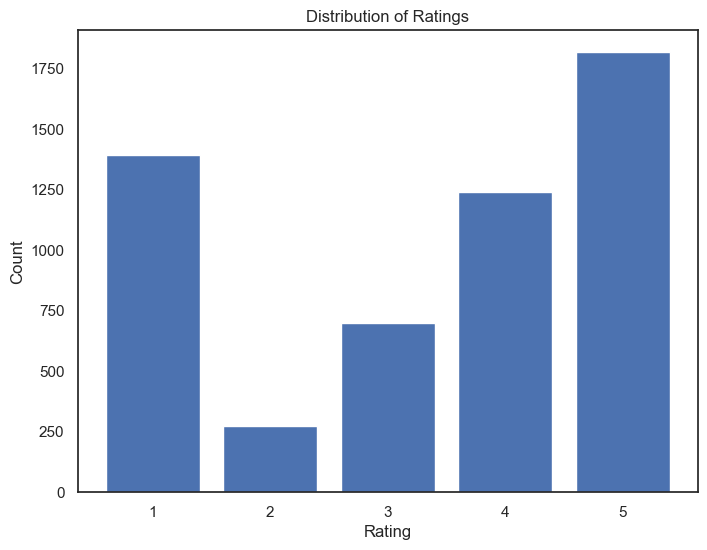

In [195]:
# Lets see how ratings are distributed accross our dataset
ratings_counts = df['Rating'].value_counts().sort_index()

print("Rating Value Counts:")
print(ratings_counts)

# Plot
plt.figure(figsize=(8, 6))
plt.bar(ratings_counts.index, ratings_counts.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(ratings_counts.index)
plt.show()

This shows us that, not many customers give a 2 start rating while 5 star ratings are given a lot

In [196]:
# Lets explore the Buyer Type column
df['Buyer type'].value_counts()

Buyer type
Certified Buyer    5419
Name: count, dtype: int64

we cann drop this column since it contains only 1 value, therefore it has no use to us

In [197]:
df.drop(['Buyer type'], axis = 1, inplace=True)
df.head()

Rating                Title             Review Content      Customer Name  \
0     4.0      Value-for-money       Very smooth gameplay  Flipkart Customer   
1     5.0            Wonderful               Nice product  Flipkart Customer   
2     3.0                 Good                       Nice      Sandeep Kumar   
3     5.0  Best in the market!          Very Good phone 📱        Sonu  Kumar   
4     5.0   Highly recommended  Nice product nice Phone 📱      Kapil Kashyap   

   Like Score  Dislike Score  
0      1737.0          537.0  
1      1285.0          434.0  
2       831.0          275.0  
3       414.0          129.0  
4       240.0           70.0

#### Lets explore Customer Name column and try to see if any customer has made more than 1 review submission

In [198]:
df['Customer Name'].value_counts()[df['Customer Name'].value_counts() > 1]

Customer Name
Flipkart Customer              849
Amit Kumar                      10
DeprecatedParam                  9
Rahul Kumar                      8
Rohit Kumar                      7
                              ... 
Deshraj Singh                    2
Sathwik reddy Sathwik reddy      2
Porika Vinod                     2
Rohit Kirnapure                  2
Arvind Arya                      2
Name: count, Length: 630, dtype: int64

There are a few customers who have submitted more than 1 review, or maybe these customers have same name, let's try and see the reviews that they have submitted

In [199]:
df[df['Customer Name'] == 'Rahul Kumar']

Rating                  Title  \
3089     3.0         Decent product   
3133     5.0  Mind-blowing purchase   
3531     5.0  Mind-blowing purchase   
4247     1.0         Unsatisfactory   
4581     3.0                   Fair   
4798     3.0         Decent product   
5054     4.0        Worth the money   
5159     4.0        Worth the money   

                                         Review Content Customer Name  \
3089                                               Nice   Rahul Kumar   
3133              Goog verry verry best mobile motorole   Rahul Kumar   
3531  EXPECTED DILEVERY TIME I GIVE MY PRODUCT EXCEL...   Rahul Kumar   
4247  Low performance,do not buy this phone  on Flip...   Rahul Kumar   
4581                                  Awesome 👍 product   Rahul Kumar   
4798                                               Nice   Rahul Kumar   
5054                                          Very good   Rahul Kumar   
5159                                               Good   Rahul Kumar   

      Like Score  Dislike Score  
3089         0.0            0.0  
3133         0.0            0.0  
3531         0.0            0.0  
4247         0.0            0.0  
4581         0.0            0.0  
4798         0.0            0.0  
5054         0.0            0.0  
5159         0.0            0.0

Since, the reviews are varying this means that these are different people with same name, So, we can drop this column as well.

In [200]:
df.drop(['Customer Name'], axis = 1, inplace=True)
df.head(20)

Rating                Title  \
0      4.0      Value-for-money   
1      5.0            Wonderful   
2      3.0                 Good   
3      5.0  Best in the market!   
4      5.0   Highly recommended   
5      5.0            Brilliant   
6      5.0        Great product   
7      5.0  Best in the market!   
8      1.0      Useless product   
9      5.0       Classy product   
10     5.0       Classy product   
11     4.0         Nice product   
12     5.0       Simply awesome   
13     4.0          Really Nice   
14     5.0            Wonderful   
15     5.0        Great product   
16     5.0    Worth every penny   
17     3.0                 Nice   
18     5.0             Terrific   
19     4.0          Pretty good   

                                       Review Content  Like Score  \
0                                Very smooth gameplay      1737.0   
1                                        Nice product      1285.0   
2                                                Nice       831.0   
3                                   Very Good phone 📱       414.0   
4                           Nice product nice Phone 📱       240.0   
5   Good but Back buttons are left , you can't cha...      1086.0   
6                                           Very good        98.0   
7                      Picture quality is very good 👍      1023.0   
8   1. Much difficult to unlock,2. Taking too much...       205.0   
9   For this price, the phone is good, not for gam...       611.0   
10  For this price, the phone is good, not for gam...       611.0   
11                              Camera nicely see 😁🤗🤠      1980.0   
12  Justify with the price Good mobile for basic u...      2099.0   
13                        Best value budget phone...!        66.0   
14                           Best Mobile In Low Price        90.0   
15                                               Good       409.0   
16  At this price range this smartphone is best..C...       213.0   
17          If yoru range is low then go for poco c51        54.0   
18                                  Perfect condition       295.0   
19  Thanks to Flipkart Velue of tha money Mobile s...       214.0   

    Dislike Score  
0           537.0  
1           434.0  
2           275.0  
3           129.0  
4            70.0  
5           372.0  
6            25.0  
7           358.0  
8            62.0  
9           212.0  
10          212.0  
11          744.0  
12          796.0  
13           16.0  
14           25.0  
15          142.0  
16           68.0  
17           13.0  
18          103.0  
19           72.0

#### Merging Title and Review Content

In [201]:
df['Review Content'] = df['Title'] + " " + df['Review Content']
df.head()

Rating                Title                                Review Content  \
0     4.0      Value-for-money          Value-for-money Very smooth gameplay   
1     5.0            Wonderful                        Wonderful Nice product   
2     3.0                 Good                                     Good Nice   
3     5.0  Best in the market!         Best in the market! Very Good phone 📱   
4     5.0   Highly recommended  Highly recommended Nice product nice Phone 📱   

   Like Score  Dislike Score  
0      1737.0          537.0  
1      1285.0          434.0  
2       831.0          275.0  
3       414.0          129.0  
4       240.0           70.0

In [202]:
df.drop(['Title'], axis = 1, inplace = True)

#### Making a new Column from the 2 score columns

In [203]:
df['Combined_Score'] = df['Like Score'] - df['Dislike Score']

In [204]:
df.drop(['Like Score', 'Dislike Score'], axis =1, inplace = True)
df.head()

Rating                                Review Content  Combined_Score
0     4.0          Value-for-money Very smooth gameplay          1200.0
1     5.0                        Wonderful Nice product           851.0
2     3.0                                     Good Nice           556.0
3     5.0         Best in the market! Very Good phone 📱           285.0
4     5.0  Highly recommended Nice product nice Phone 📱           170.0

In [205]:
df['Combined_Score'].value_counts()

Combined_Score
 0.0      3518
 1.0       807
 2.0       230
 3.0       113
-1.0        99
          ... 
 114.0       1
 297.0       1
 345.0       1
 900.0       1
 425.0       1
Name: count, Length: 179, dtype: int64

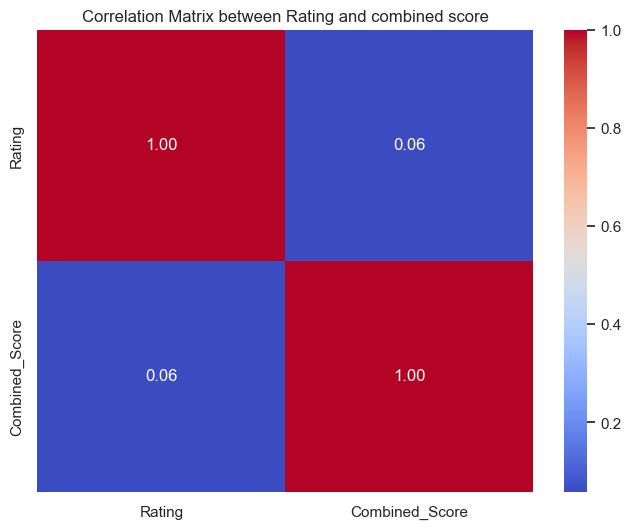

In [206]:
correlation_matrix = df[['Rating', 'Combined_Score']].corr()

# Plotting the correlation matrix using a heatmap
sns.set_theme(style='white')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix between Rating and combined score')
plt.show()

Since we are trying to predict review scores, and the score and there is no corelation betweet the score and ratings we can drop this column as it will only worsen our results

In [207]:
df.drop(['Combined_Score'], inplace = True, axis = 1)
df.head()

Rating                                Review Content
0     4.0          Value-for-money Very smooth gameplay
1     5.0                        Wonderful Nice product
2     3.0                                     Good Nice
3     5.0         Best in the market! Very Good phone 📱
4     5.0  Highly recommended Nice product nice Phone 📱

Now that we have all the important columns with us, we can start doing preprocessing on our textual data.

## Pre-Processing our Textual data

In [209]:
# Lets check out some Random rows
import random
for i in [random.randint(1, 100) for _ in range(5)]:
    print(f"Index {i}: ", df['Review Content'][i])

Index 29:  Fair Value for money
Index 55:  Must buy! It's a great mobile in this price.It's awesome experience 😃
Index 42:  Pretty good Very good 👍 👍
Index 85:  Classy product Amazing mobail under 5500 1. design amezing 💯2. Display quality super 💯3. Saund quality very nice 💯4. Performance amezing 💯5. Camera super 💯6. Battery and battery backup and charging super 💯
Index 82:  Worth the money Nice camera i like this mobile battery life is very good


##### There are many things that can be cosidered here for preprocesing like lowercasing, removing stopwords, spellchecks, removing emojis, removing punctuations etc.

#### 1. Stopwords removal

In [210]:
for i in range(1,len(df['Review Content'])):
    
    # Tokenize the text
    words = nltk.word_tokenize(df['Review Content'][i])

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Remove stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)
    
    df['Review Content'][i] = filtered_text

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = filtered_text
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\760006693.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content']

In [211]:
# Lets check out some Random rows
for i in [random.randint(1, 100) for _ in range(5)]:
    print(f"Index {i}: ", df['Review Content'][i])

Index 97:  Worthless Verizon big problem
Index 22:  Delightful Veri good mobile
Index 55:  Must buy ! 's great mobile price.It 's awesome experience 😃
Index 28:  Good quality product good low price
Index 90:  Fair Normal


Stopwords have been removed

### 2. Emoji Removal

In [212]:
for i in range(1,len(df['Review Content'])):
    df['Review Content'][i] = ''.join(c for c in df['Review Content'][i] if c not in emoji.EMOJI_DATA)

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\1696378745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = ''.join(c for c in df['Review Content'][i] if c not in emoji.EMOJI_DATA)
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\1696378745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = ''.join(c for c in df['Review Content'][i] if c not in emoji.EMOJI_DATA)
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\1696378745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

In [214]:
# 91st row earlier had a emoji in it, lets check it now
df['Review Content'][42]

'Pretty good good  '

### 3. Removing Punctuations

In [215]:
for i in range(1,len(df['Review Content'])):
    df['Review Content'][i] = df['Review Content'][i].translate(str.maketrans('', '', string.punctuation))

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\67459727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = df['Review Content'][i].translate(str.maketrans('', '', string.punctuation))
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\67459727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content'][i] = df['Review Content'][i].translate(str.maketrans('', '', string.punctuation))
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\67459727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: htt

In [216]:
# Lets check out some Random rows
for i in [random.randint(1, 100) for _ in range(5)]:
    print(f"Index {i}: ", df['Review Content'][i])

Index 56:  Could way better Avarage
Index 42:  Pretty good good  
Index 48:  Mindblowing purchase good 
Index 10:  Classy product price  phone good  gaming  use simple game
Index 56:  Could way better Avarage


### 4. Lemmatization and Lowercasing

In [217]:
# Download the WordNet corpus if not already downloaded
nltk.download('wordnet') 


# Lets create a seperate column for lemmatized text so we try to train our model on lemmatized and no lemmatized text and see the results
df['Review Content_lemmatized'] =  df['Review Content']

# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Lowercase the words and lemmatize them
    lemmatized_words = [lemmatizer.lemmatize(word.lower(), pos='v') for word in words]
    
    # Join the lemmatized words back into a single string
    lemmatized_text = ' '.join(lemmatized_words)
    
    return lemmatized_text

for i in range(1,len(df['Review Content'])):
    df['Review Content_lemmatized'][i] = lemmatize_text(df['Review Content'][i])


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rajat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content_lemmatized'][i] = lemmatize_text(df['Review Content'][i])
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content_lemmatized'][i] = lemmatize_text(df['Review Content'][i])
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarni

C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content_lemmatized'][i] = lemmatize_text(df['Review Content'][i])
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review Content_lemmatized'][i] = lemmatize_text(df['Review Content'][i])
C:\Users\rajat\AppData\Local\Temp\ipykernel_18832\3982485378.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

In [219]:
df.iloc[85]

Rating                                                                     5.0
Review Content               Classy product Amazing mobail 5500 1 design am...
Review Content_lemmatized    classy product amaze mobail 5500 1 design amez...
Name: 85, dtype: object

### Pipeline for preprocessing

In [220]:
# Custom transformer for removing stopwords
class StopwordRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stop_words = set(stopwords.words('english'))

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        filtered_text = [' '.join([word for word in nltk.word_tokenize(text) if word.lower() not in self.stop_words]) for text in X]
        return filtered_text

# Custom transformer for removing emojis
class EmojiRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned_text = [''.join([c for c in text if c not in emoji.EMOJI_DATA]) for text in X]
        return cleaned_text

# Custom transformer for removing punctuations
class PunctuationRemover(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        cleaned_text = [text.translate(str.maketrans('', '', string.punctuation)) for text in X]
        return cleaned_text

# Custom transformer for lemmatization and lowercasing
class Lemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        def lemmatize_text(text):
            words = nltk.word_tokenize(text)
            lemmatized_words = [self.lemmatizer.lemmatize(word.lower(), pos='v') for word in words]
            lemmatized_text = ' '.join(lemmatized_words)
            return lemmatized_text

        lemmatized_text = [lemmatize_text(text) for text in X]
        return lemmatized_text

# Define the pipeline
pipeline = Pipeline([
    ('stopword_remover', StopwordRemover()),
    ('emoji_remover', EmojiRemover()),
    ('punctuation_remover', PunctuationRemover()),
    ('lemmatizer', Lemmatizer())
])

# Fit and transform the data using the pipeline
# preprocessed_reviews = pipeline.fit_transform(df['Review Content'])


### Feature Extraction using BOW

In [221]:
# Bag of Words (BoW) representation for non lemmatized text
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(df['Review Content'])

bow_df = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_df

0100super  02  02days  090  10  100  1000  10000  1000012000  100mbps  \
0             0   0       0    0   0    0     0      0           0        0   
1             0   0       0    0   0    0     0      0           0        0   
2             0   0       0    0   0    0     0      0           0        0   
3             0   0       0    0   0    0     0      0           0        0   
4             0   0       0    0   0    0     0      0           0        0   
...         ...  ..     ...  ...  ..  ...   ...    ...         ...      ...   
5414          0   0       0    0   0    0     0      0           0        0   
5415          0   0       0    0   0    0     0      0           0        0   
5416          0   0       0    0   0    0     0      0           0        0   
5417          0   0       0    0   0    0     0      0           0        0   
5418          0   0       0    0   0    0     0      0           0        0   

      ...  youtube3samsung  youtubers  yr  yu  zebra  zee5  zenfhone  zero  \
0     ...                0          0   0   0      0     0         0     0   
1     ...                0          0   0   0      0     0         0     0   
2     ...                0          0   0   0      0     0         0     0   
3     ...                0          0   0   0      0     0         0     0   
4     ...                0          0   0   0      0     0         0     0   
...   ...              ...        ...  ..  ..    ...   ...       ...   ...   
5414  ...                0          0   0   0      0     0         0     0   
5415  ...                0          0   0   0      0     0         0     0   
5416  ...                0          0   0   0      0     0         0     0   
5417  ...                0          0   0   0      0     0         0     0   
5418  ...                0          0   0   0      0     0         0     0   

      zoom  zooming  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  
...    ...      ...  
5414     0        0  
5415     0        0  
5416     0        0  
5417     0        0  
5418     0        0  

[5419 rows x 4324 columns]

In [222]:
# Bag of Words (BoW) representation for lemmatized text
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(df['Review Content_lemmatized'])

bow_df_l = pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())
bow_df_l

0100super  02  02days  090  10  100  1000  10000  1000012000  100mbps  \
0             0   0       0    0   0    0     0      0           0        0   
1             0   0       0    0   0    0     0      0           0        0   
2             0   0       0    0   0    0     0      0           0        0   
3             0   0       0    0   0    0     0      0           0        0   
4             0   0       0    0   0    0     0      0           0        0   
...         ...  ..     ...  ...  ..  ...   ...    ...         ...      ...   
5414          0   0       0    0   0    0     0      0           0        0   
5415          0   0       0    0   0    0     0      0           0        0   
5416          0   0       0    0   0    0     0      0           0        0   
5417          0   0       0    0   0    0     0      0           0        0   
5418          0   0       0    0   0    0     0      0           0        0   

      ...  youtube  youtube3samsung  youtubers  yr  yu  zebra  zee5  zenfhone  \
0     ...        0                0          0   0   0      0     0         0   
1     ...        0                0          0   0   0      0     0         0   
2     ...        0                0          0   0   0      0     0         0   
3     ...        0                0          0   0   0      0     0         0   
4     ...        0                0          0   0   0      0     0         0   
...   ...      ...              ...        ...  ..  ..    ...   ...       ...   
5414  ...        0                0          0   0   0      0     0         0   
5415  ...        0                0          0   0   0      0     0         0   
5416  ...        0                0          0   0   0      0     0         0   
5417  ...        0                0          0   0   0      0     0         0   
5418  ...        0                0          0   0   0      0     0         0   

      zero  zoom  
0        0     0  
1        0     0  
2        0     0  
3        0     0  
4        0     0  
...    ...   ...  
5414     0     0  
5415     0     0  
5416     0     0  
5417     0     0  
5418     0     0  

[5419 rows x 3877 columns]

There are less number of columns proving that text normalization techniques are actually useful in decreasing the dimensions

### Feature Extraction using TF-IDF

In [223]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Content'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

0100super   02  02days  090   10  100  1000  10000  1000012000  100mbps  \
0           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
1           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
2           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
3           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
4           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
...         ...  ...     ...  ...  ...  ...   ...    ...         ...      ...   
5414        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5415        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5416        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5417        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5418        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   

      ...  youtube3samsung  youtubers   yr   yu  zebra  zee5  zenfhone  zero  \
0     ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
1     ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
2     ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
3     ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
4     ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
...   ...              ...        ...  ...  ...    ...   ...       ...   ...   
5414  ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
5415  ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
5416  ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
5417  ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   
5418  ...              0.0        0.0  0.0  0.0    0.0   0.0       0.0   0.0   

      zoom  zooming  
0      0.0      0.0  
1      0.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      0.0      0.0  
...    ...      ...  
5414   0.0      0.0  
5415   0.0      0.0  
5416   0.0      0.0  
5417   0.0      0.0  
5418   0.0      0.0  

[5419 rows x 4324 columns]

In [224]:
# TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Review Content_lemmatized'])

# Convert the TF-IDF matrix into a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_df

0100super   02  02days  090   10  100  1000  10000  1000012000  100mbps  \
0           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
1           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
2           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
3           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
4           0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
...         ...  ...     ...  ...  ...  ...   ...    ...         ...      ...   
5414        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5415        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5416        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5417        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   
5418        0.0  0.0     0.0  0.0  0.0  0.0   0.0    0.0         0.0      0.0   

      ...  youtube  youtube3samsung  youtubers   yr   yu  zebra  zee5  \
0     ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
1     ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
2     ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
3     ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
4     ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
...   ...      ...              ...        ...  ...  ...    ...   ...   
5414  ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
5415  ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
5416  ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
5417  ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   
5418  ...      0.0              0.0        0.0  0.0  0.0    0.0   0.0   

      zenfhone  zero  zoom  
0          0.0   0.0   0.0  
1          0.0   0.0   0.0  
2          0.0   0.0   0.0  
3          0.0   0.0   0.0  
4          0.0   0.0   0.0  
...        ...   ...   ...  
5414       0.0   0.0   0.0  
5415       0.0   0.0   0.0  
5416       0.0   0.0   0.0  
5417       0.0   0.0   0.0  
5418       0.0   0.0   0.0  

[5419 rows x 3877 columns]

In [225]:
# Get the BoW vocabulary
bow_vocab = count_vectorizer.get_feature_names_out()

# Get the word frequencies from the BoW matrix
word_freq = bow_matrix.sum(axis=0)

# Create a DataFrame to store word frequencies
bow_word_freq_df = pd.DataFrame(word_freq, columns=bow_vocab).transpose()
bow_word_freq_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top words
top_bow_words = bow_word_freq_df.sort_values(by='frequency', ascending=False).head(10)
print("Top words in Bag of Words (BoW):")
print(top_bow_words)

Top words in Bag of Words (BoW):
         frequency
good          2978
product       1756
phone         1556
nice          1100
mobile         783
camera         700
money          669
quality        659
battery        641
buy            604


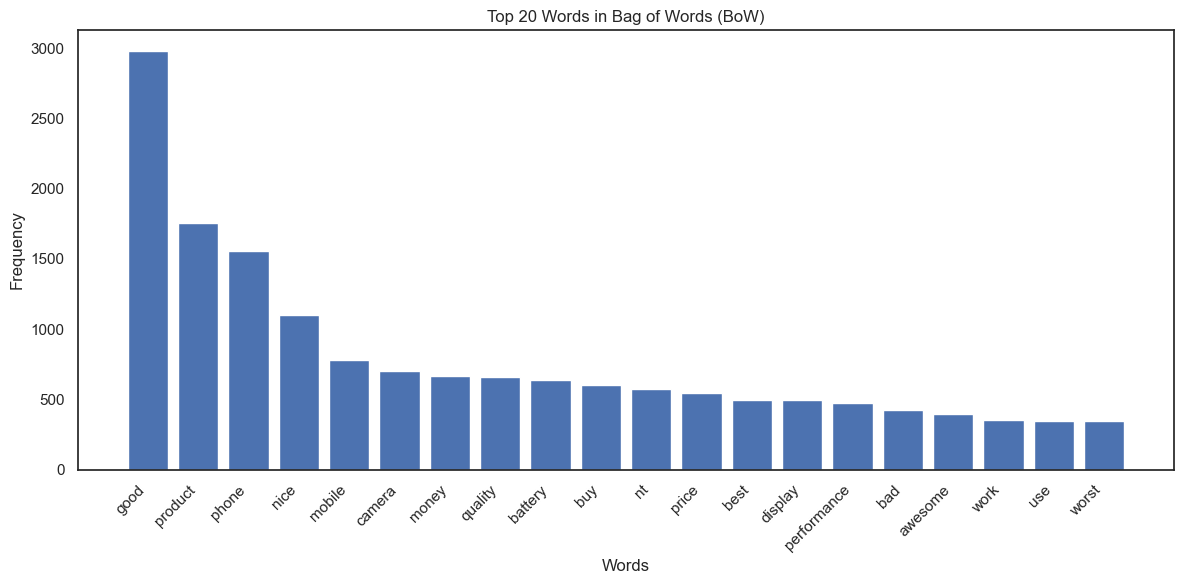

In [226]:
# Get the BoW vocabulary
bow_vocab = count_vectorizer.get_feature_names_out()

# Get the word frequencies from the BoW matrix
word_freq = bow_matrix.sum(axis=0)

# Create a DataFrame to store word frequencies
bow_word_freq_df = pd.DataFrame(word_freq, columns=bow_vocab).transpose()
bow_word_freq_df.columns = ['frequency']

# Sort the DataFrame by frequency to get the top words
top_bow_words = bow_word_freq_df.sort_values(by='frequency', ascending=False).head(20)

# Plotting the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(top_bow_words.index, top_bow_words['frequency'])
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Bag of Words (BoW)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [227]:
# Get the TF-IDF vocabulary
tfidf_vocab = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store TF-IDF values
tfidf_values_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vocab)

# Calculate the average TF-IDF value for each term
avg_tfidf_values = tfidf_values_df.mean(axis=0)

# Create a DataFrame to store average TF-IDF values
tfidf_avg_df = pd.DataFrame(avg_tfidf_values, columns=['avg_tfidf'])

# Sort the DataFrame by average TF-IDF to get the top words
top_tfidf_words = tfidf_avg_df.sort_values(by='avg_tfidf', ascending=False).head(10)
print("\nTop words in TF-IDF:")
print(top_tfidf_words)



Top words in TF-IDF:
         avg_tfidf
good      0.111050
product   0.072944
nice      0.066937
phone     0.051712
money     0.034597
mobile    0.032484
quality   0.030639
best      0.028191
awesome   0.026025
camera    0.025130


In [228]:

text_data = df['Review Content_lemmatized']

# Create a CountVectorizer for n-grams
ngram_vectorizer = CountVectorizer(ngram_range=(1, 2)) 

# Fit and transform the text data
X = ngram_vectorizer.fit_transform(text_data)

# Convert to a DataFrame for analysis
ngram_df = pd.DataFrame(X.toarray(), columns=ngram_vectorizer.get_feature_names_out())

# Concatenate n-gram DataFrame with the 'Rating' column
df_with_ngrams = pd.concat([ngram_df, df['Rating']], axis=1)

In [229]:
df_with_ngrams

0100super  0100super amoled  02  02days  02days fast  090  \
0             0                 0   0       0            0    0   
1             0                 0   0       0            0    0   
2             0                 0   0       0            0    0   
3             0                 0   0       0            0    0   
4             0                 0   0       0            0    0   
...         ...               ...  ..     ...          ...  ...   
5414          0                 0   0       0            0    0   
5415          0                 0   0       0            0    0   
5416          0                 0   0       0            0    0   
5417          0                 0   0       0            0    0   
5418          0                 0   0       0            0    0   

      090 1hr1phone  10  10 15  10 20  ...  zero battery  zero rat  zoom  \
0                 0   0      0      0  ...             0         0     0   
1                 0   0      0      0  ...             0         0     0   
2                 0   0      0      0  ...             0         0     0   
3                 0   0      0      0  ...             0         0     0   
4                 0   0      0      0  ...             0         0     0   
...             ...  ..    ...    ...  ...           ...       ...   ...   
5414              0   0      0      0  ...             0         0     0   
5415              0   0      0      0  ...             0         0     0   
5416              0   0      0      0  ...             0         0     0   
5417              0   0      0      0  ...             0         0     0   
5418              0   0      0      0  ...             0         0     0   

      zoom camera  zoom explode  zoom eye  zoom nt  zoom pic  zoom picture  \
0               0             0         0        0         0             0   
1               0             0         0        0         0             0   
2               0             0         0        0         0             0   
3               0             0         0        0         0             0   
4               0             0         0        0         0             0   
...           ...           ...       ...      ...       ...           ...   
5414            0             0         0        0         0             0   
5415            0             0         0        0         0             0   
5416            0             0         0        0         0             0   
5417            0             0         0        0         0             0   
5418            0             0         0        0         0             0   

      Rating  
0        4.0  
1        5.0  
2        3.0  
3        5.0  
4        5.0  
...      ...  
5414     4.0  
5415     4.0  
5416     4.0  
5417     4.0  
5418     4.0  

[5419 rows x 21661 columns]

### Splitting Training and Testing Data - based on tfidf_df

In [230]:
X_train, X_test, y_train, y_test = train_test_split( tfidf_df, df['Rating'].astype(int), test_size=0.2, random_state=42)

### Logistic Regression

In [231]:
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [232]:
pred_lr=LR.predict(X_test)

print("Accuracy: ",LR.score(X_test, y_test))

print(classification_report(y_test, pred_lr))

# Calculate RMSE
mse = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse)
print("RMSE:", rmse_lr)

Accuracy:  0.8920664206642066
              precision    recall  f1-score   support

           1       0.93      0.96      0.95       279
           2       0.85      0.64      0.73        55
           3       0.89      0.82      0.85       142
           4       0.84      0.87      0.85       262
           5       0.91      0.92      0.91       346

    accuracy                           0.89      1084
   macro avg       0.88      0.84      0.86      1084
weighted avg       0.89      0.89      0.89      1084

RMSE: 0.5127525028230399


### RandomForest Classifier

In [233]:
# Create an RFC instance
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RFC model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse_rfc = np.sqrt(mse)
print("RMSE:", rmse_rfc)

Accuracy: 0.9077490774907749
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.98      0.95       279
           2       0.90      0.69      0.78        55
           3       0.92      0.85      0.88       142
           4       0.89      0.85      0.87       262
           5       0.91      0.95      0.93       346

    accuracy                           0.91      1084
   macro avg       0.91      0.86      0.88      1084
weighted avg       0.91      0.91      0.91      1084

RMSE: 0.47053396691645993


### XGBoost Classifier

In [234]:
# Convert classes in y to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Create an XGBoost classifier instance
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train_adj)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_adj, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_adj, y_pred_xgb))

Accuracy: 0.9261992619926199
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       279
           1       0.87      0.84      0.85        55
           2       0.89      0.92      0.90       142
           3       0.89      0.89      0.89       262
           4       0.94      0.94      0.94       346

    accuracy                           0.93      1084
   macro avg       0.91      0.91      0.91      1084
weighted avg       0.93      0.93      0.93      1084

RMSE: 1.08834821864073


In [238]:
# Calculate RMSE
mse = mean_squared_error(y_test_adj, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
print("RMSE:", rmse_xgb)

RMSE: 0.42953677958755776


### Overall results using tfidf_df

In [239]:
models = ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier']
accuracies = [0.8920664206642066, 0.9077490774907749, 0.9261992619926199] 
rmse = [rmse_lr, rmse_rfc, rmse_xgb]  

# Create a DataFrame
results_df_1 = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'RMSE': rmse})
results_df_1

Model  Accuracy      RMSE
0       Logistic Regression  0.892066  0.512753
1  Random Forest Classifier  0.907749  0.470534
2        XGBoost Classifier  0.926199  0.429537

### Splitting Training and Testing Data - based on df_with_ngrams

In [240]:
X_train, X_test, y_train, y_test = train_test_split(df_with_ngrams.drop(['Rating'], axis = 1), df_with_ngrams['Rating'].astype(int), test_size=0.2, random_state=42)

### Modelling - Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [242]:
pred_lr=LR.predict(X_test)

In [243]:
LR.score(X_test, y_test)

0.9308118081180812

In [245]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       279
           2       0.94      0.85      0.90        55
           3       0.88      0.93      0.90       142
           4       0.91      0.88      0.90       262
           5       0.93      0.95      0.94       346

    accuracy                           0.93      1084
   macro avg       0.93      0.92      0.92      1084
weighted avg       0.93      0.93      0.93      1084



In [247]:
# Calculate RMSE
mse = mean_squared_error(y_test, pred_lr)
rmse_lr = np.sqrt(mse)
print("RMSE:", rmse_lr)

RMSE: 0.386583101628802


### Modelling - Random Forest

In [248]:
from sklearn.metrics import classification_report

# Create an RFC instance
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the RFC model
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate RMSE (Note: This is not a standard metric for classification)
mse = mean_squared_error(y_test, y_pred)
rmse_rfc = np.sqrt(mse)
print("RMSE:", rmse_rfc)


Accuracy: 0.9197416974169742
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.97      0.95       279
           2       0.94      0.82      0.87        55
           3       0.91      0.87      0.89       142
           4       0.91      0.89      0.90       262
           5       0.93      0.94      0.93       346

    accuracy                           0.92      1084
   macro avg       0.92      0.90      0.91      1084
weighted avg       0.92      0.92      0.92      1084

RMSE: 0.48786000048559086


### Modelling - XGBoost

In [249]:
# Convert classes in y to start from 0
y_train_adj = y_train - 1
y_test_adj = y_test - 1

# Create an XGBoost classifier instance
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(X_train, y_train_adj)

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test_adj, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Print classification report
print("Classification Report:")
print(classification_report(y_test_adj, y_pred_xgb))


Accuracy: 0.9363468634686347
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       279
           1       0.90      0.84      0.87        55
           2       0.86      0.94      0.90       142
           3       0.91      0.90      0.91       262
           4       0.96      0.95      0.95       346

    accuracy                           0.94      1084
   macro avg       0.92      0.92      0.92      1084
weighted avg       0.94      0.94      0.94      1084



In [254]:
# Calculate RMSE (Note: This is not a standard metric for classification)
mse = mean_squared_error(y_test_adj, y_pred_xgb)
rmse_xgb = np.sqrt(mse)
print("RMSE:", rmse_xgb)

RMSE: 0.3682510775117445


In [255]:
models = ['Logistic Regression', 'Random Forest Classifier', 'XGBoost Classifier']
accuracies = [0.9308118081180812, 0.9197416974169742, 0.9363468634686347] 
rmse = [rmse_lr, rmse_rfc, rmse_xgb]  

# Create a DataFrame
results_df_2 = pd.DataFrame({'Model': models, 'Accuracy': accuracies, 'RMSE': rmse})
results_df_2

Model  Accuracy      RMSE
0       Logistic Regression  0.930812  0.386583
1  Random Forest Classifier  0.919742  0.487860
2        XGBoost Classifier  0.936347  0.368251

### Hyperparameter Tuning

#### Since XgBoost is giving the highest initial accuracy we can go with hyperparameter tuning of that model

In [185]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    }

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=2, n_jobs=-1, verbose=5)


# Fit the grid search to the data
grid_search.fit(X_train, y_train_adj)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_xgb_model = grid_search.best_estimator_
y_pred_best = best_xgb_model.predict(X_test)

# Calculate accuracy
accuracy_best = accuracy_score(y_test_adj, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

# Print classification report for the best model
print("Classification Report for Best Model:")
print(classification_report(y_test_adj, y_pred_best))


Fitting 2 folds for each of 243 candidates, totalling 486 fits


KeyboardInterrupt: 

In [ ]:
# Sorry we ran this cell by mistake and the results disappeared at the last moment